In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_network(df, from_hashtag=""):
    ''' returns a dataframe with the edges and timestamp from tweets feed (df)'''
    
    if from_hashtag != "":
        mask = df["hashtags"].apply(lambda x: from_hashtag in x)
        filteredDf = df[mask]
    else:
        filteredDf = df

    edges_df = filteredDf[['screen_name', 'reply_to_screen_name', 'created_at']]

    mask = (df.screen_name == df.reply_to_screen_name)
    edges_df = edges_df[~mask] 
    edges_df = edges_df.dropna()
    edges_df = edges_df.drop_duplicates().reset_index(drop=True)
    edges_df = edges_df.rename(columns={'screen_name': 'from', 'reply_to_screen_name': 'to'})
    
    return edges_df


def get_strongly_gcc(G):
    """ get the giant strongly connected component of G""" 
    SGcc = max(nx.strongly_connected_components(G), key=len)
    SGcc = G.subgraph(SGcc)
    return SGcc

def get_weakly_gcc(G):
    """ get the giant weakly connected component of G"""  
    WGcc = max(nx.weakly_connected_components(G), key=len)
    WGcc = G.subgraph(WGcc)
    return WGcc
   

def plot_network(G, G_degree=None, outputname="default"):
    ''' plot the graph with varying nodesize '''
    
    fig = plt.figure(num=None, figsize=(15, 15), dpi=60, facecolor='w', edgecolor='k')
    pos = nx.spring_layout(G)
    
    if G_degree:
        node_size=[v * 10 for v in dict(G_degree).values()]
    else:
        node_size = 1
        
    nx.draw(G, pos, nodelist=dict(G_degree).keys(), node_size=node_size, width=0.5, alpha=0.5, edge_color='purple')
    plt.axis('off')
    plt.show()
    fig.savefig("./viz/" +outputname + "-network.svg", transparent=True)

In [3]:
# when we merge dataset and put it in csv, these no longer retain their original types
# so we need the converters + eval to bring their original form back basically
df = pd.read_csv('data/merged-dataset.csv', converters={"hashtags": eval, "mentions": eval, "is_quote": eval}) 
df.columns

Index(['status_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_screen_name', 'is_quote', 'is_retweet',
       'favourites_count', 'retweet_count', 'country_code', 'followers_count',
       'friends_count', 'verified', 'lang', 'hashtags', 'mentions'],
      dtype='object')

In [4]:
df

,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,followers_count,friends_count,verified,lang,hashtags,mentions
0,1244051645710897155,2020-03-29T00:00:00Z,SSalud_mx,¡#Infórmate! #ConferenciaDePrensa sobre el #Co...,TweetDeck,NaN,NaN,False,False,3954,49,NaN,812318,212,True,es,"[ConferenciaDePrensa, Coronavirus, COVID19]",[]
1,1244051645971025920,2020-03-29T00:00:00Z,CGTNOfficial,First medical team aiding #Wuhan in fight agai...,Twitter Media Studio,NaN,NaN,False,False,65,18,NaN,14040072,55,True,en,"[Wuhan, COVID19, CoronavirusOutbreak]",[]
2,1244051647329779713,2020-03-29T00:00:00Z,DiarioLibre,| #Coronavirus | EEUU aprueba test de coronavi...,TweetDeck,NaN,NaN,False,False,321,12,NaN,1185042,23738,True,es,"[Coronavirus, DL, DiarioLibre, Actualidad, Int...",[]
3,1244051646415425536,2020-03-29T00:00:00Z,lahoraecuador,Debido a la emergencia sanitaria que vive el p...,TweetDeck,NaN,NaN,False,False,2384,19,NaN,534729,1696,False,es,"[Ecuador, Covid19]",[]
4,1244051647418044418,2020-03-29T00:00:00Z,ABSCBNNews,"Singapore donates 40,000 test kits to the Phil...",TweetDeck,NaN,NaN,False,False,1073,840,NaN,6767144,1075,True,en,[COVID19],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679130,1256010240044290048,2020-04-30T23:59:11Z,WellingMichael,#Venezuela Narco dictatorship of Maduro now ta...,Twitter for iPhone,NaN,NaN,False,False,261795,29,NaN,44514,19381,False,en,"[Venezuela, coronavirus, COVID19, StayAtHome, ...",[]
679131,1256010295174205440,2020-04-30T23:59:24Z,revistavistazo,“Nos enfrentamos a la sexta extinción y la gen...,Twitter for Advertisers,NaN,NaN,False,False,456,58,NaN,433254,443,True,es,"[JeremyRifkin, coronavirus]",[]
679132,1256010321107525636,2020-04-30T23:59:30Z,JaySnapps,A Tribute to the Pirate Graduates of 2020\n\nA...,Twitter Web App,NaN,NaN,False,False,8893,13,NaN,747,643,False,en,"[COVID19, seniors2020]","[@CoachHarder11, @nagleee, @PiratesPage, @Pira..."
679133,1256010352900354053,2020-04-30T23:59:38Z,VillaFernando_,En 12 años Correa/Moreno entregaron 1200 millo...,Twitter for iPhone,NaN,NaN,False,False,26034,328,NaN,39344,7484,True,es,"[Petrochina, COVID19]",[]


In [29]:
get_network(df)

,from,to,created_at
0,zorayapuente,Reylope13,2020-03-29T00:05:37Z
1,Farmarato,MarinMoises14,2020-03-29T00:08:16Z
2,juanfherrero,JPAlvarezGuedea,2020-03-29T00:10:16Z
3,threadreaderapp,DrJenniferCo_Vu,2020-03-29T00:10:31Z
4,manmadeflowers,marijeali,2020-03-29T00:10:45Z
...,...,...,...
15257,jav48790239,AFPespanol,2020-04-30T23:31:22Z
15258,spasonoro,lubrio,2020-04-30T23:31:23Z
15259,GoboMontaco,JoeBiden,2020-04-30T23:39:09Z
15260,Gavazzi28,wilsonwitzel,2020-04-30T23:41:22Z


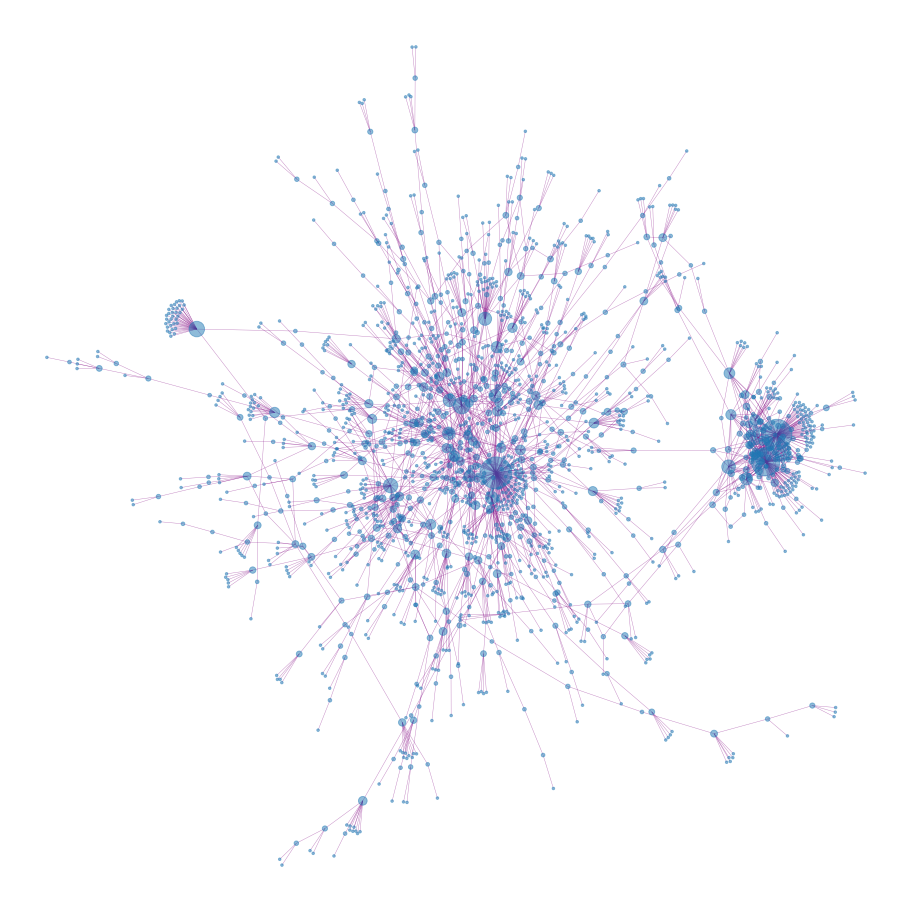

In [46]:
hashtag = "COVID19"
edges_df = get_network(df, from_hashtag=hashtag)
G = nx.from_pandas_edgelist(edges_df, 'from', 'to', create_using=nx.DiGraph())
Gcc = get_weakly_gcc(G)
Gcc = Gcc.to_undirected()
Gcc_degree = Gcc.degree()

plot_network(Gcc, Gcc_degree, hashtag)



In [6]:
whole_network_graph = get_network(df)
G = nx.from_pandas_edgelist(whole_network_graph, 'from', 'to', create_using=nx.DiGraph())

weightDf = pd.DataFrame(dict(G.degree()).items(), columns=['user', 'degree'])
weightDf.sort_values(by="degree", inplace=True, ascending=False, ignore_index=True)


In [26]:
mentionDf = pd.DataFrame(dict(whole_network_graph.to.value_counts()).items(), columns=['user', 'num_replies_rcvd'])
mentionDf

,user,num_replies_rcvd
0,realDonaldTrump,721
1,DiazCanelB,645
2,DeZurdaTeam,541
3,Maryam_Rajavi,127
4,WhiteHouse,99
...,...,...
7108,AARP,1
7109,AHindinews,1
7110,charms_india,1
7111,choo_ek,1


In [27]:
combined = pd.concat([weightDf, mentionDf["num_replies_rcvd"]], axis=1)
combined = combined[0:10]

<AxesSubplot:xlabel='user'>

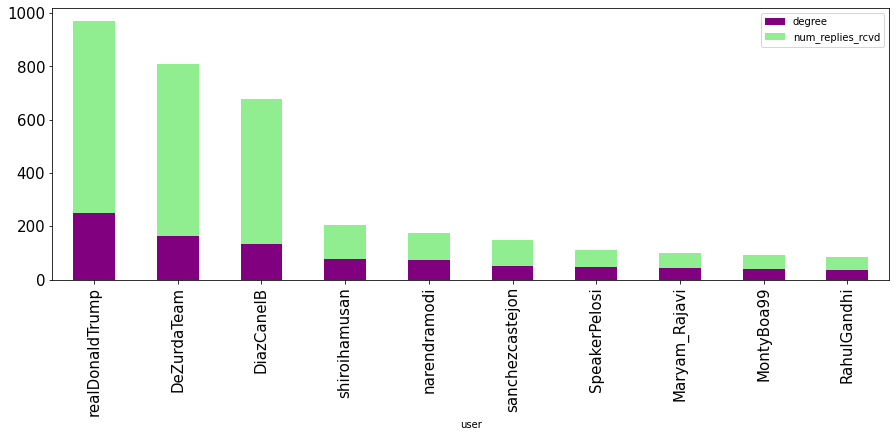

In [28]:
combined.plot.bar(stacked=True, x="user", figsize=(15,5), fontsize=15, color=["purple", "lightgreen"])